<a href="https://colab.research.google.com/github/shicong0720/Finding-Healthy-Community-Design-Criteria-with-AI/blob/main/2_7_Query_OSM_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up environment

In [ ]:
!pip install pyproj

In [ ]:
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import numpy as np
import shapely
import math

In [ ]:
drive.mount('/content/gdrive',force_remount=True)
os.chdir("/content/gdrive/My Drive/big data and city/")

Mounted at /content/gdrive


# Get CA places boundary 

In [ ]:
% pip install geopandas

In [ ]:
import geopandas as gpd


/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
CA_boundary = gpd.read_file("CA_Places_TIGER2016.geojson")
CA_boundary.head()


,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,66140,02411785,0666140,San Fernando,San Fernando city,25,C1,N,N,G4110,A,6148697,0,+34.2886519,-118.4362413,"POLYGON ((-13186463.855 4067122.651, -13186256..."
1,06,14190,02409487,0614190,Cloverdale,Cloverdale city,25,C1,N,N,G4110,A,7863863,59201,+38.7959624,-123.0153700,"POLYGON ((-13696207.846 4691208.338, -13696205..."
2,06,16560,02410240,0616560,Cotati,Cotati city,25,C1,N,N,G4110,A,4869007,8380,+38.3284920,-122.7100491,"POLYGON ((-13662197.838 4626644.614, -13662188..."
3,06,65042,02411779,0665042,San Buenaventura (Ventura),San Buenaventura (Ventura) city,25,C1,Y,N,G4110,A,56500370,27033715,+34.2677796,-119.2542062,"MULTIPOLYGON (((-13280094.138 4075172.878, -13..."
4,06,30014,02410601,0630014,Glendora,Glendora city,25,C1,N,N,G4110,A,50251851,403066,+34.1449667,-117.8476672,"POLYGON ((-13123577.793 4048398.248, -13123527..."


In [ ]:
CA_boundary['area'] = np.nan
for i in range(len(CA_boundary)):
  CA_boundary.loc[i,'area'] = CA_boundary.loc[i,'geometry'].area


In [ ]:
CA_boundary.head()


,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area
0,06,66140,02411785,0666140,San Fernando,San Fernando city,25,C1,N,N,G4110,A,6148697,0,+34.2886519,-118.4362413,"POLYGON ((-13186463.855 4067122.651, -13186256...",9.029680e+06
1,06,14190,02409487,0614190,Cloverdale,Cloverdale city,25,C1,N,N,G4110,A,7863863,59201,+38.7959624,-123.0153700,"POLYGON ((-13696207.846 4691208.338, -13696205...",1.306247e+07
2,06,16560,02410240,0616560,Cotati,Cotati city,25,C1,N,N,G4110,A,4869007,8380,+38.3284920,-122.7100491,"POLYGON ((-13662197.838 4626644.614, -13662188...",7.937943e+06
3,06,65042,02411779,0665042,San Buenaventura (Ventura),San Buenaventura (Ventura) city,25,C1,Y,N,G4110,A,56500370,27033715,+34.2677796,-119.2542062,"MULTIPOLYGON (((-13280094.138 4075172.878, -13...",1.226129e+08
4,06,30014,02410601,0630014,Glendora,Glendora city,25,C1,N,N,G4110,A,50251851,403066,+34.1449667,-117.8476672,"POLYGON ((-13123577.793 4048398.248, -13123527...",7.413832e+07


# Get Health Data from CDC

In [ ]:
health_data = pd.read_csv("PLACES__Place_Data__GIS_Friendly_Format___2020_release.csv")

In [ ]:
health_data.head()

,StateAbbr,StateDesc,PlaceName,PlaceFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,ARTHRITIS_AdjPrev,ARTHRITIS_Adj95CI,BINGE_CrudePrev,BINGE_Crude95CI,BINGE_AdjPrev,BINGE_Adj95CI,BPHIGH_CrudePrev,BPHIGH_Crude95CI,BPHIGH_AdjPrev,BPHIGH_Adj95CI,BPMED_CrudePrev,BPMED_Crude95CI,BPMED_AdjPrev,BPMED_Adj95CI,CANCER_CrudePrev,CANCER_Crude95CI,CANCER_AdjPrev,CANCER_Adj95CI,CASTHMA_CrudePrev,CASTHMA_Crude95CI,CASTHMA_AdjPrev,CASTHMA_Adj95CI,CERVICAL_CrudePrev,CERVICAL_Crude95CI,CERVICAL_AdjPrev,CERVICAL_Adj95CI,CHD_CrudePrev,CHD_Crude95CI,CHD_AdjPrev,...,HIGHCHOL_Crude95CI,HIGHCHOL_AdjPrev,HIGHCHOL_Adj95CI,KIDNEY_CrudePrev,KIDNEY_Crude95CI,KIDNEY_AdjPrev,KIDNEY_Adj95CI,LPA_CrudePrev,LPA_Crude95CI,LPA_AdjPrev,LPA_Adj95CI,MAMMOUSE_CrudePrev,MAMMOUSE_Crude95CI,MAMMOUSE_AdjPrev,MAMMOUSE_Adj95CI,MHLTH_CrudePrev,MHLTH_Crude95CI,MHLTH_AdjPrev,MHLTH_Adj95CI,OBESITY_CrudePrev,OBESITY_Crude95CI,OBESITY_AdjPrev,OBESITY_Adj95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,PHLTH_AdjPrev,PHLTH_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,AL,Alabama,Cardiff,112040,55,13.9,"(10.7, 17.5)",NaN,NaN,33.3,"(31.5, 35.0)",NaN,NaN,17.0,"(16.0, 17.8)",NaN,NaN,39.2,"(37.4, 40.8)",NaN,NaN,79.2,"(78.0, 80.6)",NaN,NaN,8.0,"( 7.5, 8.6)",NaN,NaN,9.9,"( 9.1, 10.7)",NaN,NaN,86.4,"(83.0, 89.4)",NaN,NaN,8.2,"( 7.2, 9.3)",NaN,...,"(37.3, 40.0)",NaN,NaN,3.2,"( 2.9, 3.6)",NaN,NaN,28.9,"(25.3, 32.6)",NaN,NaN,75.2,"(69.4, 80.0)",NaN,NaN,15.9,"(14.2, 17.8)",NaN,NaN,31.9,"(30.2, 33.3)",NaN,NaN,15.1,"(13.1, 17.1)",NaN,NaN,36.1,"(34.3, 37.7)",NaN,NaN,4.0,"( 3.4, 4.6)",NaN,NaN,17.7,"(10.1, 27.6)",NaN,NaN,POINT (-86.93055692 33.64718829)
1,AL,Alabama,Dayton,119912,52,18.7,"(15.5, 22.4)",NaN,NaN,40.8,"(38.9, 42.7)",NaN,NaN,9.4,"( 8.8, 10.0)",NaN,NaN,53.5,"(51.7, 55.1)",NaN,NaN,84.1,"(83.2, 85.1)",NaN,NaN,7.6,"( 7.1, 8.1)",NaN,NaN,12.5,"(11.6, 13.6)",NaN,NaN,84.8,"(82.2, 87.5)",NaN,NaN,10.9,"( 9.9, 12.0)",NaN,...,"(40.8, 43.5)",NaN,NaN,4.7,"( 4.3, 5.2)",NaN,NaN,38.8,"(35.0, 42.8)",NaN,NaN,79.4,"(75.3, 83.1)",NaN,NaN,18.4,"(16.6, 20.4)",NaN,NaN,49.1,"(46.9, 51.0)",NaN,NaN,20.7,"(18.4, 23.2)",NaN,NaN,44.3,"(42.4, 46.0)",NaN,NaN,6.4,"( 5.7, 7.2)",NaN,NaN,22.9,"(15.0, 31.4)",NaN,NaN,POINT (-87.64157264 32.35095759)
2,AL,Alabama,Fort Rucker,127640,4636,13.6,"(11.0, 16.6)",NaN,NaN,10.4,"( 9.6, 11.3)",NaN,NaN,24.5,"(23.0, 26.2)",NaN,NaN,16.1,"(14.9, 17.2)",NaN,NaN,40.1,"(38.5, 41.7)",NaN,NaN,1.9,"( 1.8, 2.1)",NaN,NaN,8.6,"( 8.1, 9.2)",NaN,NaN,86.1,"(83.7, 88.5)",NaN,NaN,1.5,"( 1.3, 1.6)",NaN,...,"(14.5, 15.9)",NaN,NaN,1.0,"( 0.9, 1.0)",NaN,NaN,17.5,"(14.9, 20.3)",NaN,NaN,82.3,"(78.6, 85.4)",NaN,NaN,15.8,"(13.8, 17.8)",NaN,NaN,34.6,"(32.3, 37.1)",NaN,NaN,6.7,"( 5.9, 7.6)",NaN,NaN,38.9,"(36.3, 41.4)",NaN,NaN,0.8,"( 0.7, 0.9)",NaN,NaN,9.3,"( 5.7, 13.5)",NaN,NaN,POINT (-85.71541353 31.3428536)
3,AL,Alabama,Goldville,130448,55,14.8,"(11.8, 18.3)",NaN,NaN,34.6,"(33.1, 36.2)",NaN,NaN,13.4,"(12.6, 14.3)",NaN,NaN,40.3,"(38.8, 41.7)",NaN,NaN,79.1,"(77.9, 80.2)",NaN,NaN,8.4,"( 7.9, 8.8)",NaN,NaN,10.4,"( 9.7, 11.2)",NaN,NaN,84.0,"(81.0, 86.5)",NaN,NaN,9.8,"( 8.7, 11.0)",NaN,...,"(37.4, 40.1)",NaN,NaN,3.4,"( 3.1, 3.8)",NaN,NaN,30.8,"(27.5, 34.3)",NaN,NaN,74.1,"(70.4, 78.0)",NaN,NaN,16.9,"(15.3, 18.6)",NaN,NaN,29.7,"(28.1, 31.2)",NaN,NaN,15.7,"(13.9, 17.6)",NaN,NaN,35.4,"(33.8, 36.8)",NaN,NaN,4.4,"( 3.8, 5.1)",NaN,NaN,20.7,"(13.1, 29.0)",NaN,NaN,POINT (-85.78313009 33.08413388)
4,AL,Alabama,Gulfcrest,132248,161,16.6,"(14.1, 19.4)",NaN,NaN,33.4,"(31.9, 34.7)",NaN,NaN,17.8,"(17.0, 18.6)",NaN,NaN,38.7,"(37.4, 39.8)",NaN,NaN,76.9,"(75.8, 78.0)",NaN,NaN,7.2,"( 6.8, 7.6)",NaN,NaN,10.6,"( 9.9, 11.4)",NaN,NaN,84.9,"(82.1, 87.4)",NaN,NaN,9.2,"( 8.3, 10.2)",NaN,...,"(37.2, 39.5)",NaN,NaN,3.1,"( 2.9, 3.4)",NaN,NaN,30.5,"(27.5, 33.3)",NaN,NaN,79.6,"(76.1, 82.6)",NaN,NaN,17.6

In [ ]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28484 entries, 0 to 28483
Columns: 118 entries, StateAbbr to Geolocation
dtypes: float64(56), int64(2), object(60)
memory usage: 25.6+ MB


In [ ]:
health_data.nunique()

StateAbbr                 51
StateDesc                 51
PlaceName              18856
PlaceFIPS              28484
TotalPopulation         9805
                       ...  
TEETHLOST_CrudePrev      452
TEETHLOST_Crude95CI    15938
TEETHLOST_AdjPrev        446
TEETHLOST_Adj95CI      14752
Geolocation            28484
Length: 118, dtype: int64

In [ ]:
CA_Data = health_data[health_data['StateAbbr'] == 'CA']

In [ ]:
CA_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 62 to 6032
Columns: 118 entries, StateAbbr to Geolocation
dtypes: float64(56), int64(2), object(60)
memory usage: 1.3+ MB


# Process Health Data and get the Longitude and Latitude


In [ ]:
Obesity_CA_data = CA_Data[['Geolocation','PlaceName','TotalPopulation','ACCESS2_CrudePrev','ARTHRITIS_CrudePrev','BINGE_CrudePrev','BPHIGH_CrudePrev','BPMED_CrudePrev','CANCER_CrudePrev','CASTHMA_CrudePrev', 'CERVICAL_CrudePrev', 'CHD_CrudePrev', 'KIDNEY_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev', 'OBESITY_CrudePrev','PHLTH_CrudePrev','SLEEP_CrudePrev','STROKE_CrudePrev','TEETHLOST_CrudePrev']].reset_index(drop=True)
Obesity_CA_data.head()


,Geolocation,PlaceName,TotalPopulation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CERVICAL_CrudePrev,CHD_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev
0,POINT (-118.7086997 37.5500014),Aspen Springs,65,7.2,27.9,18.5,32.3,72.6,7.7,10.1,85.1,6.2,2.8,18.7,74.6,13.3,28.4,14.1,31.8,3.2,9.8
1,POINT (-121.3542419 39.10957105),Beale AFB,1319,10.8,9.5,29.3,13.2,35.1,2.2,9.7,83.3,1.4,1.1,14.7,77.6,15.9,24.2,8.1,36.5,0.9,8.4
2,POINT (-114.2654065 34.17512002),Bluewater,172,9.9,52.2,8.5,54.6,85.9,14.7,10.0,79.6,17.7,6.8,32.1,68.4,11.4,33.6,23.9,31.1,8.5,19.7
3,POINT (-117.3787077 33.2285493),Camp Pendleton South,10616,15.4,7.2,30.5,12.8,28.1,1.5,9.4,77.5,1.2,1.0,16.6,80.5,18.0,22.8,8.6,35.0,0.8,9.5
4,POINT (-118.0261244 36.31229084),Cartago,92,13.3,29.6,17.8,35.3,72.6,7.7,10.8,82.7,9.2,3.7,25.3,73.0,15.8,30.1,17.8,33.5,4.5,17.9


In [ ]:
Obesity_CA_data['longitude'] = np.nan
Obesity_CA_data['latitude'] = np.nan
i = 0
while i  < Obesity_CA_data.shape[0]:
  a = Obesity_CA_data.loc[i, 'Geolocation']
  a = a.split()
  Obesity_CA_data.loc[i,'longitude'] = float(a[1].replace('(', ''))
  Obesity_CA_data.loc[i,'latitude'] = float(a[2].replace(')', ''))
  i += 1

In [ ]:
Obesity_CA_data.head()

,Geolocation,PlaceName,TotalPopulation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CERVICAL_CrudePrev,CHD_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,longitude,latitude
0,POINT (-118.7086997 37.5500014),Aspen Springs,65,7.2,27.9,18.5,32.3,72.6,7.7,10.1,85.1,6.2,2.8,18.7,74.6,13.3,28.4,14.1,31.8,3.2,9.8,-118.708700,37.550001
1,POINT (-121.3542419 39.10957105),Beale AFB,1319,10.8,9.5,29.3,13.2,35.1,2.2,9.7,83.3,1.4,1.1,14.7,77.6,15.9,24.2,8.1,36.5,0.9,8.4,-121.354242,39.109571
2,POINT (-114.2654065 34.17512002),Bluewater,172,9.9,52.2,8.5,54.6,85.9,14.7,10.0,79.6,17.7,6.8,32.1,68.4,11.4,33.6,23.9,31.1,8.5,19.7,-114.265406,34.175120
3,POINT (-117.3787077 33.2285493),Camp Pendleton South,10616,15.4,7.2,30.5,12.8,28.1,1.5,9.4,77.5,1.2,1.0,16.6,80.5,18.0,22.8,8.6,35.0,0.8,9.5,-117.378708,33.228549
4,POINT (-118.0261244 36.31229084),Cartago,92,13.3,29.6,17.8,35.3,72.6,7.7,10.8,82.7,9.2,3.7,25.3,73.0,15.8,30.1,17.8,33.5,4.5,17.9,-118.026124,36.312291


In [ ]:
Obesity_CA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Geolocation          1472 non-null   object 
 1   PlaceName            1472 non-null   object 
 2   TotalPopulation      1472 non-null   int64  
 3   ACCESS2_CrudePrev    1472 non-null   float64
 4   ARTHRITIS_CrudePrev  1472 non-null   float64
 5   BINGE_CrudePrev      1472 non-null   float64
 6   BPHIGH_CrudePrev     1458 non-null   float64
 7   BPMED_CrudePrev      1458 non-null   float64
 8   CANCER_CrudePrev     1472 non-null   float64
 9   CASTHMA_CrudePrev    1472 non-null   float64
 10  CERVICAL_CrudePrev   1472 non-null   float64
 11  CHD_CrudePrev        1472 non-null   float64
 12  KIDNEY_CrudePrev     1472 non-null   float64
 13  LPA_CrudePrev        1472 non-null   float64
 14  MAMMOUSE_CrudePrev   1472 non-null   float64
 15  MHLTH_CrudePrev      1472 non-null   f

# Get data from OPENSTREETMAP

In [ ]:
import requests
import json


overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name="California"][admin_level=4]->.s;
( 
  node(area.s)["amenity"="parking_space"];
  way(area.s)["amenity"="parking_space"];
  rel(area.s)["amenity"="parking_space"];
)->._;
out center;
"""
response = requests.get(overpass_url,
                        params={'data': overpass_query})
data = response.json()


 rel(area.s)["amentiy"="hospital"];

In [ ]:
data

{'elements': [{'id': 2140948887,
   'lat': 32.7610487,
   'lon': -117.1459775,
   'tags': {'amenity': 'parking_space', 'disabled': 'yes', 'source': 'survey'},
   'type': 'node'},
  {'id': 2149549830,
   'lat': 32.7465123,
   'lon': -117.1527483,
   'tags': {'amenity': 'parking_space',
    'fixme': 'tag for disabled permit only',
    'source': 'survey'},
   'type': 'node'},
  {'id': 2149589243,
   'lat': 32.748281,
   'lon': -117.1513167,
   'tags': {'amenity': 'parking_space',
    'fixme': 'mark for disabled parking only',
    'source': 'survey'},
   'type': 'node'},
  {'id': 3888950799,
   'lat': 37.2439796,
   'lon': -121.9582922,
   'tags': {'access': 'customers',
    'amenity': 'parking_space',
    'capacity': '1',
    'fee': 'no',
    'parking': 'surface',
    'smoothness': 'good',
    'surface': 'asphalt',
    'wheelchair': 'yes'},
   'type': 'node'},
  {'id': 3888950800,
   'lat': 37.2439735,
   'lon': -121.9583444,
   'tags': {'access': 'customers',
    'amenity': 'parking_spac

https://janakiev.com/blog/openstreetmap-with-python-and-overpass-api/
Loading Data from OpenStreetMap with Python and the Overpass API

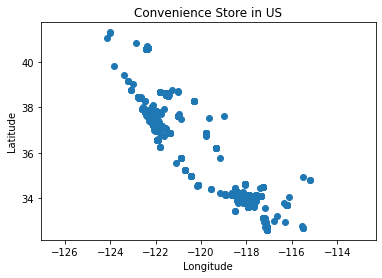

In [ ]:
import matplotlib.pyplot as plt

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Convenience Store in US')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [ ]:

X.shape

(5221, 2)

In [ ]:
X= pd.DataFrame(X)
X



,0,1
0,-117.145978,32.761049
1,-117.152748,32.746512
2,-117.151317,32.748281
3,-121.958292,37.243980
4,-121.958344,37.243974
...,...,...
5216,-118.434159,34.287551
5217,-118.434183,34.287573
5218,-118.434136,34.287529
5219,-117.559756,33.922517


# Turn health data and POI data into GeoDataFrame

In [ ]:

Obesity_CA_GEO = gpd.GeoDataFrame(Obesity_CA_data,   geometry=gpd.points_from_xy(Obesity_CA_data.longitude, Obesity_CA_data.latitude))
Obesity_CA_GEO.set_crs(epsg=4326, inplace=True)

,Geolocation,PlaceName,TotalPopulation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CERVICAL_CrudePrev,CHD_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,longitude,latitude,geometry
0,POINT (-118.7086997 37.5500014),Aspen Springs,65,7.2,27.9,18.5,32.3,72.6,7.7,10.1,85.1,6.2,2.8,18.7,74.6,13.3,28.4,14.1,31.8,3.2,9.8,-118.708700,37.550001,POINT (-118.70870 37.55000)
1,POINT (-121.3542419 39.10957105),Beale AFB,1319,10.8,9.5,29.3,13.2,35.1,2.2,9.7,83.3,1.4,1.1,14.7,77.6,15.9,24.2,8.1,36.5,0.9,8.4,-121.354242,39.109571,POINT (-121.35424 39.10957)
2,POINT (-114.2654065 34.17512002),Bluewater,172,9.9,52.2,8.5,54.6,85.9,14.7,10.0,79.6,17.7,6.8,32.1,68.4,11.4,33.6,23.9,31.1,8.5,19.7,-114.265406,34.175120,POINT (-114.26541 34.17512)
3,POINT (-117.3787077 33.2285493),Camp Pendleton South,10616,15.4,7.2,30.5,12.8,28.1,1.5,9.4,77.5,1.2,1.0,16.6,80.5,18.0,22.8,8.6,35.0,0.8,9.5,-117.378708,33.228549,POINT (-117.37871 33.22855)
4,POINT (-118.0261244 36.31229084),Cartago,92,13.3,29.6,17.8,35.3,72.6,7.7,10.8,82.7,9.2,3.7,25.3,73.0,15.8,30.1,17.8,33.5,4.5,17.9,-118.026124,36.312291,POINT (-118.02612 36.31229)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1467,POINT (-117.3966668 35.77005373),Searles Valley,1739,12.7,32.7,16.9,35.2,73.2,7.2,11.4,79.7,8.7,3.8,27.0,74.6,17.0,36.9,19.8,37.8,4.5,18.7,-117.396667,35.770054,POINT (-117.39667 35.77005)
1468,POINT (-117.8161012 33.99916303),Diamond Bar,55544,8.9,16.1,14.4,23.5,70.9,5.1,6.7,79.1,4.0,2.2,16.8,79.7,9.0,18.2,9.2,35.2,2.2,5.4,-117.816101,33.999163,POINT (-117.81610 33.99916)
1469,POINT (-119.2731331 34.45048507),Meiners Oaks,3571,11.6,23.5,17.3,30.3,69.0,6.9,9.7,85.6,5.9,2.9,20.7,76.2,13.2,25.0,13.8,32.3,3.0,10.3,-119.273133,34.450485,POINT (-119.27313 34.45049)
1470,POINT (-121.8340462 36.96058954),Aptos Hills-Larkin Valley,2354,8.8,24.8,18.5,27.8,71.3,7.4,8.9,86.5,5.5,2.7,16.1,79.0,11.0,20.3,11.6,28.1,2.8,7.9,-121.834046,36.960590,POINT (-121.83405 36.96059)


In [ ]:
Convenient_Store = gpd.GeoDataFrame(X,   geometry=gpd.points_from_xy(X[0], X[1]))
Convenient_Store
Convenient_Store.set_crs(epsg=4326, inplace=True)


,0,1,geometry
0,-117.145978,32.761049,POINT (-117.14598 32.76105)
1,-117.152748,32.746512,POINT (-117.15275 32.74651)
2,-117.151317,32.748281,POINT (-117.15132 32.74828)
3,-121.958292,37.243980,POINT (-121.95829 37.24398)
4,-121.958344,37.243974,POINT (-121.95834 37.24397)
...,...,...,...
5216,-118.434159,34.287551,POINT (-118.43416 34.28755)
5217,-118.434183,34.287573,POINT (-118.43418 34.28757)
5218,-118.434136,34.287529,POINT (-118.43414 34.28753)
5219,-117.559756,33.922517,POINT (-117.55976 33.92252)


# Setup sjoin (run twice)

In [ ]:
!apt-get install -qq curl g++ make

In [ ]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   385k      0  0:00:01  0:00:01 --:--:--  385k


In [ ]:
os.chdir('spatialindex-src-1.8.5')

In [ ]:
!mount -o remount,exec /content

mount: /content: mount point not mounted or bad option.


In [ ]:
!./configure

checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
configure: WARNING: Libtool does not cope well with whitespace in `pwd`
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes


In [ ]:
!make

Making all in src
make[1]: Entering directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src'
Making all in storagemanager
make[2]: Entering directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/storagemanager'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/storagemanager'
Making all in spatialindex
make[2]: Entering directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/spatialindex'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/spatialindex'
Making all in rtree
make[2]: Entering directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/rtree'
make[2]: Nothing to be done for 'all'.
make[2]: Leaving directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/rtree'
Making all in mvrtree
ma

In [ ]:
!make install

Making install in src
make[1]: Entering directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src'
Making install in storagemanager
make[2]: Entering directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Entering directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/storagemanager'
make[2]: Leaving directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/storagemanager'
Making install in spatialindex
make[2]: Entering directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Entering directory '/content/gdrive/My Drive/big data and city/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Nothing to be done 

In [ ]:
!apt install libspatialindex-dev
!pip install rtree
!pip install pygeos

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


In [ ]:
!ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
!apt install libspatialindex-dev
!pip install rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


In [ ]:
import rtree
import pygeos

# Space join

In [ ]:
sjoined_listings = gpd.sjoin(Obesity_CA_GEO, CA_boundary.to_crs(epsg=4326), op='within')
sjoined_listings.head()



,Geolocation,PlaceName,TotalPopulation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CERVICAL_CrudePrev,CHD_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,longitude,latitude,geometry,index_right,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,area
0,POINT (-118.7086997 37.5500014),Aspen Springs,65,7.2,27.9,18.5,32.3,72.6,7.7,10.1,85.1,6.2,2.8,18.7,74.6,13.3,28.4,14.1,31.8,3.2,9.8,-118.708700,37.550001,POINT (-118.70870 37.55000),521,06,03026,02582936,0603026,Aspen Springs,Aspen Springs CDP,57,U1,N,N,G4210,S,9242504,1964,+37.5487908,-118.6996633,1.473285e+07
1,POINT (-121.3542419 39.10957105),Beale AFB,1319,10.8,9.5,29.3,13.2,35.1,2.2,9.7,83.3,1.4,1.1,14.7,77.6,15.9,24.2,8.1,36.5,0.9,8.4,-121.354242,39.109571,POINT (-121.35424 39.10957),536,06,04576,02407813,0604576,Beale AFB,Beale AFB CDP,57,M2,N,N,G4210,S,26153588,25614,+39.1080613,-121.3512148,4.354110e+07
2,POINT (-114.2654065 34.17512002),Bluewater,172,9.9,52.2,8.5,54.6,85.9,14.7,10.0,79.6,17.7,6.8,32.1,68.4,11.4,33.6,23.9,31.1,8.5,19.7,-114.265406,34.175120,POINT (-114.26541 34.17512),567,06,07172,02407869,0607172,Bluewater,Bluewater CDP,57,U1,N,N,G4210,S,2310231,1167974,+34.1756490,-114.2671160,5.094403e+06
3,POINT (-117.3787077 33.2285493),Camp Pendleton South,10616,15.4,7.2,30.5,12.8,28.1,1.5,9.4,77.5,1.2,1.0,16.6,80.5,18.0,22.8,8.6,35.0,0.8,9.5,-117.378708,33.228549,POINT (-117.37871 33.22855),623,06,10561,02407947,0610561,Camp Pendleton South,Camp Pendleton South CDP,57,M2,N,N,G4210,S,10135419,254481,+33.2284125,-117.3808637,1.488873e+07
4,POINT (-118.0261244 36.31229084),Cartago,92,13.3,29.6,17.8,35.3,72.6,7.7,10.8,82.7,9.2,3.7,25.3,73.0,15.8,30.1,17.8,33.5,4.5,17.9,-118.026124,36.312291,POINT (-118.02612 36.31229),634,06,11600,02407973,0611600,Cartago,Cartago CDP,57,U1,N,N,G4210,S,3028826,7192,+36.3052395,-118.0271663,4.685152e+06


In [ ]:
sjoined_listings.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1469 entries, 0 to 1471
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Geolocation          1469 non-null   object  
 1   PlaceName            1469 non-null   object  
 2   TotalPopulation      1469 non-null   int64   
 3   ACCESS2_CrudePrev    1469 non-null   float64 
 4   ARTHRITIS_CrudePrev  1469 non-null   float64 
 5   BINGE_CrudePrev      1469 non-null   float64 
 6   BPHIGH_CrudePrev     1455 non-null   float64 
 7   BPMED_CrudePrev      1455 non-null   float64 
 8   CANCER_CrudePrev     1469 non-null   float64 
 9   CASTHMA_CrudePrev    1469 non-null   float64 
 10  CERVICAL_CrudePrev   1469 non-null   float64 
 11  CHD_CrudePrev        1469 non-null   float64 
 12  KIDNEY_CrudePrev     1469 non-null   float64 
 13  LPA_CrudePrev        1469 non-null   float64 
 14  MAMMOUSE_CrudePrev   1469 non-null   float64 
 15  MHLTH_CrudePr

In [ ]:
sjoined_listings2 = gpd.sjoin(Convenient_Store, CA_boundary.to_crs(epsg=4326), op='within')
sjoined_listings2.head()

,0,1,geometry,index_right,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,area
0,-117.145978,32.761049,POINT (-117.14598 32.76105),439,06,66000,02411782,0666000,San Diego,San Diego city,25,C1,Y,N,G4110,A,842252395,122244773,+32.8152995,-117.1349930,1.369409e+09
1,-117.152748,32.746512,POINT (-117.15275 32.74651),439,06,66000,02411782,0666000,San Diego,San Diego city,25,C1,Y,N,G4110,A,842252395,122244773,+32.8152995,-117.1349930,1.369409e+09
2,-117.151317,32.748281,POINT (-117.15132 32.74828),439,06,66000,02411782,0666000,San Diego,San Diego city,25,C1,Y,N,G4110,A,842252395,122244773,+32.8152995,-117.1349930,1.369409e+09
61,-117.141011,32.812697,POINT (-117.14101 32.81270),439,06,66000,02411782,0666000,San Diego,San Diego city,25,C1,Y,N,G4110,A,842252395,122244773,+32.8152995,-117.1349930,1.369409e+09
418,-117.161324,32.718228,POINT (-117.16132 32.71823),439,06,66000,02411782,0666000,San Diego,San Diego city,25,C1,Y,N,G4110,A,842252395,122244773,+32.8152995,-117.1349930,1.369409e+09


In [ ]:
sjoined_listings2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5076 entries, 0 to 5218
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   0            5076 non-null   float64 
 1   1            5076 non-null   float64 
 2   geometry     5076 non-null   geometry
 3   index_right  5076 non-null   int64   
 4   STATEFP      5076 non-null   object  
 5   PLACEFP      5076 non-null   object  
 6   PLACENS      5076 non-null   object  
 7   GEOID        5076 non-null   object  
 8   NAME         5076 non-null   object  
 9   NAMELSAD     5076 non-null   object  
 10  LSAD         5076 non-null   object  
 11  CLASSFP      5076 non-null   object  
 12  PCICBSA      5076 non-null   object  
 13  PCINECTA     5076 non-null   object  
 14  MTFCC        5076 non-null   object  
 15  FUNCSTAT     5076 non-null   object  
 16  ALAND        5076 non-null   int64   
 17  AWATER       5076 non-null   int64   
 18  INTPTLAT     5076 no

In [ ]:
res = pd.merge(sjoined_listings, sjoined_listings2, on='GEOID', suffixes = ['_obesity', 'convenience_store'], how='left')
res.head()

,Geolocation,PlaceName,TotalPopulation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CERVICAL_CrudePrev,CHD_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,longitude,latitude,geometry_obesity,index_right_obesity,STATEFP_obesity,PLACEFP_obesity,PLACENS_obesity,GEOID,NAME_obesity,NAMELSAD_obesity,LSAD_obesity,CLASSFP_obesity,PCICBSA_obesity,PCINECTA_obesity,MTFCC_obesity,FUNCSTAT_obesity,ALAND_obesity,AWATER_obesity,INTPTLAT_obesity,INTPTLON_obesity,area_obesity,0,1,geometryconvenience_store,index_rightconvenience_store,STATEFPconvenience_store,PLACEFPconvenience_store,PLACENSconvenience_store,NAMEconvenience_store,NAMELSADconvenience_store,LSADconvenience_store,CLASSFPconvenience_store,PCICBSAconvenience_store,PCINECTAconvenience_store,MTFCCconvenience_store,FUNCSTATconvenience_store,ALANDconvenience_store,AWATERconvenience_store,INTPTLATconvenience_store,INTPTLONconvenience_store,areaconvenience_store
0,POINT (-118.7086997 37.5500014),Aspen Springs,65,7.2,27.9,18.5,32.3,72.6,7.7,10.1,85.1,6.2,2.8,18.7,74.6,13.3,28.4,14.1,31.8,3.2,9.8,-118.708700,37.550001,POINT (-118.70870 37.55000),521,06,03026,02582936,0603026,Aspen Springs,Aspen Springs CDP,57,U1,N,N,G4210,S,9242504,1964,+37.5487908,-118.6996633,1.473285e+07,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,POINT (-121.3542419 39.10957105),Beale AFB,1319,10.8,9.5,29.3,13.2,35.1,2.2,9.7,83.3,1.4,1.1,14.7,77.6,15.9,24.2,8.1,36.5,0.9,8.4,-121.354242,39.109571,POINT (-121.35424 39.10957),536,06,04576,02407813,0604576,Beale AFB,Beale AFB CDP,57,M2,N,N,G4210,S,26153588,25614,+39.1080613,-121.3512148,4.354110e+07,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,POINT (-114.2654065 34.17512002),Bluewater,172,9.9,52.2,8.5,54.6,85.9,14.7,10.0,79.6,17.7,6.8,32.1,68.4,11.4,33.6,23.9,31.1,8.5,19.7,-114.265406,34.175120,POINT (-114.26541 34.17512),567,06,07172,02407869,0607172,Bluewater,Bluewater CDP,57,U1,N,N,G4210,S,2310231,1167974,+34.1756490,-114.2671160,5.094403e+06,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,POINT (-117.3787077 33.2285493),Camp Pendleton South,10616,15.4,7.2,30.5,12.8,28.1,1.5,9.4,77.5,1.2,1.0,16.6,80.5,18.0,22.8,8.6,35.0,0.8,9.5,-117.378708,33.228549,POINT (-117.37871 33.22855),623,06,10561,02407947,0610561,Camp Pendleton South,Camp Pendleton South CDP,57,M2,N,N,G4210,S,10135419,254481,+33.2284125,-117.3808637,1.488873e+07,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,POINT (-118.0261244 36.31229084),Cartago,92,13.3,29.6,17.8,35.3,72.6,7.7,10.8,82.7,9.2,3.7,25.3,73.0,15.8,30.1,17.8,33.5,4.5,17.9,-118.026124,36.312291,POINT (-118.02612 36.31229),634,06,11600,02407973,0611600,Cartago,Cartago CDP,57,U1,N,N,G4210,S,3028826,7192,+36.3052395,-118.0271663,4.685152e+06,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
res.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 6422 entries, 0 to 6421
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Geolocation                   6422 non-null   object  
 1   PlaceName                     6422 non-null   object  
 2   TotalPopulation               6422 non-null   int64   
 3   ACCESS2_CrudePrev             6422 non-null   float64 
 4   ARTHRITIS_CrudePrev           6422 non-null   float64 
 5   BINGE_CrudePrev               6422 non-null   float64 
 6   BPHIGH_CrudePrev              6408 non-null   float64 
 7   BPMED_CrudePrev               6408 non-null   float64 
 8   CANCER_CrudePrev              6422 non-null   float64 
 9   CASTHMA_CrudePrev             6422 non-null   float64 
 10  CERVICAL_CrudePrev            6422 non-null   float64 
 11  CHD_CrudePrev                 6422 non-null   float64 
 12  KIDNEY_CrudePrev              6422 non-n

In [ ]:
res2 = res[[0, 1,'GEOID','area_obesity']]
res2

,0,1,GEOID,area_obesity
0,NaN,NaN,0603026,1.473285e+07
1,NaN,NaN,0604576,4.354110e+07
2,NaN,NaN,0607172,5.094403e+06
3,NaN,NaN,0610561,1.488873e+07
4,NaN,NaN,0611600,4.685152e+06
...,...,...,...,...
6417,NaN,NaN,0670728,4.137475e+07
6418,NaN,NaN,0619192,5.623347e+07
6419,NaN,NaN,0646702,5.376852e+06
6420,NaN,NaN,0602382,3.770893e+07


In [ ]:
res2.nunique()

0               4978
1               4956
GEOID           1469
area_obesity    1469
dtype: int64

# Get Count for Each GEOID


In [ ]:
count = res2.groupby('GEOID').count()
count


,0,1,area_obesity
GEOID,,,
0600135,0,0,1
0600156,0,0,1
0600212,0,0,1
0600296,0,0,1
0600310,0,0,1
...,...,...,...
0686944,0,0,1
0686972,0,0,1
0687042,0,0,1


In [ ]:
res3 = pd.merge(res2, count, on = ['GEOID'], how = 'inner')
res3

,0_x,1_x,GEOID,area_obesity_x,0_y,1_y,area_obesity_y
0,NaN,NaN,0603026,1.473285e+07,0,0,1
1,NaN,NaN,0604576,4.354110e+07,0,0,1
2,NaN,NaN,0607172,5.094403e+06,0,0,1
3,NaN,NaN,0610561,1.488873e+07,0,0,1
4,NaN,NaN,0611600,4.685152e+06,0,0,1
...,...,...,...,...,...,...,...
6417,NaN,NaN,0670728,4.137475e+07,0,0,1
6418,NaN,NaN,0619192,5.623347e+07,0,0,1
6419,NaN,NaN,0646702,5.376852e+06,0,0,1
6420,NaN,NaN,0602382,3.770893e+07,0,0,1


In [ ]:

run_count = res3.drop_duplicates(keep = 'first', subset = 'GEOID')
run_count = run_count.loc[:,['0_x','1_x','GEOID','area_obesity_x','0_y']]
run_count.reset_index(drop=True)


,0_x,1_x,GEOID,area_obesity_x,0_y
0,NaN,NaN,0603026,1.473285e+07,0
1,NaN,NaN,0604576,4.354110e+07,0
2,NaN,NaN,0607172,5.094403e+06,0
3,NaN,NaN,0610561,1.488873e+07,0
4,NaN,NaN,0611600,4.685152e+06,0
...,...,...,...,...,...
1464,NaN,NaN,0670728,4.137475e+07,0
1465,NaN,NaN,0619192,5.623347e+07,0
1466,NaN,NaN,0646702,5.376852e+06,0
1467,NaN,NaN,0602382,3.770893e+07,0


# Get points distance standard deviation

In [ ]:
mean = res3.groupby('GEOID').mean()
mean

,0_x,1_x,area_obesity_x,0_y,1_y,area_obesity_y
GEOID,,,,,,
0600135,NaN,NaN,1.919532e+06,0,0,1
0600156,NaN,NaN,3.935714e+06,0,0,1
0600212,NaN,NaN,1.501439e+08,0,0,1
0600296,NaN,NaN,2.029883e+08,0,0,1
0600310,NaN,NaN,1.576429e+07,0,0,1
...,...,...,...,...,...,...
0686944,NaN,NaN,4.680799e+07,0,0,1
0686972,NaN,NaN,6.467652e+07,0,0,1
0687042,NaN,NaN,1.073409e+08,0,0,1


In [ ]:

run_std =  pd.merge(res3, mean, on = ['GEOID'])
run_std



,0_x_x,1_x_x,GEOID,area_obesity_x_x,0_y_x,1_y_x,area_obesity_y_x,0_x_y,1_x_y,area_obesity_x_y,0_y_y,1_y_y,area_obesity_y_y
0,NaN,NaN,0603026,1.473285e+07,0,0,1,NaN,NaN,1.473285e+07,0,0,1
1,NaN,NaN,0604576,4.354110e+07,0,0,1,NaN,NaN,4.354110e+07,0,0,1
2,NaN,NaN,0607172,5.094403e+06,0,0,1,NaN,NaN,5.094403e+06,0,0,1
3,NaN,NaN,0610561,1.488873e+07,0,0,1,NaN,NaN,1.488873e+07,0,0,1
4,NaN,NaN,0611600,4.685152e+06,0,0,1,NaN,NaN,4.685152e+06,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6417,NaN,NaN,0670728,4.137475e+07,0,0,1,NaN,NaN,4.137475e+07,0,0,1
6418,NaN,NaN,0619192,5.623347e+07,0,0,1,NaN,NaN,5.623347e+07,0,0,1
6419,NaN,NaN,0646702,5.376852e+06,0,0,1,NaN,NaN,5.376852e+06,0,0,1
6420,NaN,NaN,0602382,3.770893e+07,0,0,1,NaN,NaN,3.770893e+07,0,0,1


In [ ]:
run_std['(x-c)^2 + (y-c)^2'] = (run_std['0_x_x'] - run_std['0_x_y'])**2 + (run_std['1_x_x'] - run_std['1_x_y'])**2
run_std = run_std.loc[:,['(x-c)^2 + (y-c)^2', 'GEOID']].groupby('GEOID').sum()
run = pd.merge(run_count, run_std, on = ['GEOID'], how = 'right')
run

,0_x,1_x,GEOID,area_obesity_x,0_y,(x-c)^2 + (y-c)^2
0,NaN,NaN,0600135,1.919532e+06,0,0.0
1,NaN,NaN,0600156,3.935714e+06,0,0.0
2,NaN,NaN,0600212,1.501439e+08,0,0.0
3,NaN,NaN,0600296,2.029883e+08,0,0.0
4,NaN,NaN,0600310,1.576429e+07,0,0.0
...,...,...,...,...,...,...
1464,NaN,NaN,0686944,4.680799e+07,0,0.0
1465,NaN,NaN,0686972,6.467652e+07,0,0.0
1466,NaN,NaN,0687042,1.073409e+08,0,0.0
1467,NaN,NaN,0687056,1.516083e+08,0,0.0


In [ ]:
run['STD'] = np.nan

for i in range (0,run.shape[0]):
  run.at[i, 'STD'] = math.sqrt(run.at[i, '(x-c)^2 + (y-c)^2'])/run.at[i, '0_y']

run

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


,0_x,1_x,GEOID,area_obesity_x,0_y,(x-c)^2 + (y-c)^2,STD
0,NaN,NaN,0600135,1.919532e+06,0,0.0,NaN
1,NaN,NaN,0600156,3.935714e+06,0,0.0,NaN
2,NaN,NaN,0600212,1.501439e+08,0,0.0,NaN
3,NaN,NaN,0600296,2.029883e+08,0,0.0,NaN
4,NaN,NaN,0600310,1.576429e+07,0,0.0,NaN
...,...,...,...,...,...,...,...
1464,NaN,NaN,0686944,4.680799e+07,0,0.0,NaN
1465,NaN,NaN,0686972,6.467652e+07,0,0.0,NaN
1466,NaN,NaN,0687042,1.073409e+08,0,0.0,NaN
1467,NaN,NaN,0687056,1.516083e+08,0,0.0,NaN


In [ ]:
s = pd.merge(run, sjoined_listings, on = ['GEOID'], how = 'left')
s

,0_x,1_x,GEOID,area_obesity_x,0_y,(x-c)^2 + (y-c)^2,STD,Geolocation,PlaceName,TotalPopulation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CERVICAL_CrudePrev,CHD_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev,longitude,latitude,geometry,index_right,STATEFP,PLACEFP,PLACENS,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,area
0,NaN,NaN,0600135,1.919532e+06,0,0.0,NaN,POINT (-122.0777214 37.90739342),Acalanes Ridge,1137,4.8,23.8,17.0,26.2,73.7,8.2,8.4,88.7,4.8,2.4,12.1,81.7,8.8,20.2,9.3,28.2,2.3,4.5,-122.077721,37.907393,POINT (-122.07772 37.90739),482,06,00135,02582926,Acalanes Ridge,Acalanes Ridge CDP,57,U1,N,N,G4210,S,1193073,0,+37.9047221,-122.0785741,1.919532e+06
1,NaN,NaN,0600156,3.935714e+06,0,0.0,NaN,POINT (-121.2798914 38.17352869),Acampo,341,19.4,21.1,18.8,28.1,67.9,5.6,9.8,83.0,6.0,3.0,26.5,73.7,14.7,36.0,14.6,35.4,3.1,14.6,-121.279891,38.173529,POINT (-121.27989 38.17353),483,06,00156,02629758,Acampo,Acampo CDP,57,U1,N,N,G4210,S,2428474,0,+38.1735286,-121.2798915,3.935714e+06
2,NaN,NaN,0600212,1.501439e+08,0,0.0,NaN,POINT (-118.1857637 34.49558912),Acton,7596,8.6,22.2,19.4,27.1,69.0,6.8,9.1,85.9,5.2,2.6,16.9,77.7,13.0,25.9,12.5,34.3,2.8,8.0,-118.185764,34.495589,POINT (-118.18576 34.49559),484,06,00212,02407697,Acton,Acton CDP,57,U1,N,N,G4210,S,101679341,60418,+34.4960703,-118.1838970,1.501439e+08
3,NaN,NaN,0600296,2.029883e+08,0,0.0,NaN,POINT (-117.4397779 34.58143992),Adelanto,31760,25.0,21.8,17.8,28.4,61.5,3.7,11.6,78.3,5.5,3.2,32.2,76.4,19.4,41.5,19.1,42.5,3.4,24.0,-117.439778,34.581440,POINT (-117.43978 34.58144),254,06,00296,02409663,Adelanto,Adelanto city,25,C1,N,N,G4110,A,137220854,45848,+34.5809017,-117.4394577,2.029883e+08
4,NaN,NaN,0600310,1.576429e+07,0,0.0,NaN,POINT (-120.958739 41.19452041),Adin,272,11.5,32.3,16.3,35.4,75.2,8.9,10.9,81.2,8.8,3.8,25.3,74.7,15.3,29.1,17.8,32.4,4.6,17.0,-120.958739,41.194520,POINT (-120.95874 41.19452),485,06,00310,02582927,Adin,Adin CDP,57,U1,N,N,G4210,S,8901691,15858,+41.1993122,-120.9567786,1.576429e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,NaN,NaN,0686944,4.680799e+07,0,0.0,NaN,POINT (-122.6311481 41.72925569),Yreka,7765,11.1,30.5,17.0,35.5,74.9,8.4,11.0,81.4,8.6,3.8,24.3,75.5,15.6,28.4,17.2,32.3,4.5,16.4,-122.631148,41.729256,POINT (-122.63115 41.72926),433,06,86944,02412324,Yreka,Yreka city,25,C1,N,N,G4110,A,25861897,188155,+41.7240335,-122.6315699,4.680799e+07
1465,NaN,NaN,0686972,6.467652e+07,0,0.0,NaN,POINT (-121.6381466 39.13574343),Yuba City,65547,15.8,23.3,18.4,28.6,69.3,5.9,9.9,79.3,6.1,3.0,26.1,74.3,15.1,27.5,15.1,35.0,3.3,15.4,-121.638147,39.135743,POINT (-121.63815 39.13574),278,06,86972,02412325,Yuba City,Yuba City city,25,C1,Y,N,G4110,A,38657275,201005,+39.1385876,-121.6396607,6.467652e+07
1466,NaN,NaN,0687042,1.073409e+08,0,0.0,NaN,POINT (-117.0429912 34.03357035),Yucaipa,51359,11.7,26.8,18.7,29.4,70.1,6.6,9.9,83.6,6.2,3.0,21.9,75.7,13.8,32.7,14.7,35.5,3.2,13.4,-117.042991,34.033570,POINT (-117.04299 34.03357),480,06,87042,02412326,Yucaipa,Yucaipa city,25,C1,N,N,G4110,A,73532054,0,+34.0335234,-117.0426099,1.073409e+08
1467,NaN,NaN,0687056,1.516083e+08,0,0.0,NaN,POINT (-116.4215548 34.12335206),Yucca Valley,20663,11.6,31.7,16.9,33.7,73.8,7.7,10.6,81.4,8.2,3.7,24.8,74.6,15.0,34.3,17.5,36.1,4.2,16.7,-116.421555,34.123352,POINT (-116.42155 34.12335),481,06,87056,02413524,Yucca Valley,Yucca Valley town,43,C1,N,N,G4110,A,103639185,0,+34.1230893,-116.4214814,1.516083e+08


In [ ]:
run = run[['STD','0_y']]
run

,STD,0_y
0,NaN,0
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
...,...,...
1464,NaN,0
1465,NaN,0
1466,NaN,0
1467,NaN,0


In [ ]:
CA_heal = s[['area_obesity_x','TotalPopulation','ACCESS2_CrudePrev','ARTHRITIS_CrudePrev','BINGE_CrudePrev','BPHIGH_CrudePrev','BPMED_CrudePrev','CANCER_CrudePrev','CASTHMA_CrudePrev', 'CERVICAL_CrudePrev', 'CHD_CrudePrev', 'KIDNEY_CrudePrev', 'LPA_CrudePrev', 'MAMMOUSE_CrudePrev', 'MHLTH_CrudePrev', 'OBESITY_CrudePrev','PHLTH_CrudePrev','SLEEP_CrudePrev','STROKE_CrudePrev','TEETHLOST_CrudePrev']]

In [ ]:
CA_heal

,area_obesity_x,TotalPopulation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CERVICAL_CrudePrev,CHD_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev
0,1.919532e+06,1137,4.8,23.8,17.0,26.2,73.7,8.2,8.4,88.7,4.8,2.4,12.1,81.7,8.8,20.2,9.3,28.2,2.3,4.5
1,3.935714e+06,341,19.4,21.1,18.8,28.1,67.9,5.6,9.8,83.0,6.0,3.0,26.5,73.7,14.7,36.0,14.6,35.4,3.1,14.6
2,1.501439e+08,7596,8.6,22.2,19.4,27.1,69.0,6.8,9.1,85.9,5.2,2.6,16.9,77.7,13.0,25.9,12.5,34.3,2.8,8.0
3,2.029883e+08,31760,25.0,21.8,17.8,28.4,61.5,3.7,11.6,78.3,5.5,3.2,32.2,76.4,19.4,41.5,19.1,42.5,3.4,24.0
4,1.576429e+07,272,11.5,32.3,16.3,35.4,75.2,8.9,10.9,81.2,8.8,3.8,25.3,74.7,15.3,29.1,17.8,32.4,4.6,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,4.680799e+07,7765,11.1,30.5,17.0,35.5,74.9,8.4,11.0,81.4,8.6,3.8,24.3,75.5,15.6,28.4,17.2,32.3,4.5,16.4
1465,6.467652e+07,65547,15.8,23.3,18.4,28.6,69.3,5.9,9.9,79.3,6.1,3.0,26.1,74.3,15.1,27.5,15.1,35.0,3.3,15.4
1466,1.073409e+08,51359,11.7,26.8,18.7,29.4,70.1,6.6,9.9,83.6,6.2,3.0,21.9,75.7,13.8,32.7,14.7,35.5,3.2,13.4
1467,1.516083e+08,20663,11.6,31.7,16.9,33.7,73.8,7.7,10.6,81.4,8.2,3.7,24.8,74.6,15.0,34.3,17.5,36.1,4.2,16.7


In [ ]:
CA_heal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 0 to 1468
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_obesity_x       1469 non-null   float64
 1   TotalPopulation      1469 non-null   int64  
 2   ACCESS2_CrudePrev    1469 non-null   float64
 3   ARTHRITIS_CrudePrev  1469 non-null   float64
 4   BINGE_CrudePrev      1469 non-null   float64
 5   BPHIGH_CrudePrev     1455 non-null   float64
 6   BPMED_CrudePrev      1455 non-null   float64
 7   CANCER_CrudePrev     1469 non-null   float64
 8   CASTHMA_CrudePrev    1469 non-null   float64
 9   CERVICAL_CrudePrev   1469 non-null   float64
 10  CHD_CrudePrev        1469 non-null   float64
 11  KIDNEY_CrudePrev     1469 non-null   float64
 12  LPA_CrudePrev        1469 non-null   float64
 13  MAMMOUSE_CrudePrev   1469 non-null   float64
 14  MHLTH_CrudePrev      1469 non-null   float64
 15  OBESITY_CrudePrev    1469 non-null   f

# Export data

In [ ]:
os.chdir("/content/gdrive/My Drive/big data and city/")

In [ ]:
run.to_csv('amenity_parking_space.csv', header=False, index=False)
#CA_heal.to_csv('CA_heal.csv', header=False, index=False)